# autoML 라이브러리 pycaret 설치

In [ ]:
pip install pycaret

In [3]:
# 버전 확인
import pycaret
pycaret.__version__

'2.2.0'

# 데이터 로드

In [4]:
import pandas as pd
data = pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Time열 제거
data.drop('Time',axis=1, inplace=True)

# Initialize Setup

In [1]:
from pycaret.classification import *

In [2]:
clf = setup(data = data, target = 'Class',train_size=0.8, session_id=6)

NameError: name 'data' is not defined

True로 설정하면 GPU 를 지원하는 알고리즘으로 훈련에 GPU 를 사용 하고 사용할 수없는 경우 CPU로 대체합니다. 'force'로 설정하면 GPU 지원 알고리즘 만 사용하고 사용할 수없는 경우 예외를 발생시킵니다. False이면 모든 알고리즘이 CPU 만 사용하여 훈련됩니다.

GPU 지원 알고리즘 :

Extreme Gradient Boosting, 추가 설치 필요 없음

CatBoost Classifier, 추가 설치 필요 없음 ( GPU 는 데이터가 50,000 행 이상인 경우에만 활성화 됨)

Light Gradient Boosting Machine, GPU 설치 필요 https://lightgbm.readthedocs.io/en/latest/GPU-Tutorial.html

로지스틱 회귀, 능선 분류기, 랜덤 포레스트, K 이웃 분류기, 서포트 벡터 머신, cuML> = 0.15 필요 https://github.com/rapidsai/cuml

In [6]:
# GPU가 적용되는 모델 확인
models(internal=True)[['Name', 'GPU Enabled']]

,Name,GPU Enabled
ID,,
lr,Logistic Regression,False
knn,K Neighbors Classifier,False
nb,Naive Bayes,False
dt,Decision Tree Classifier,False
svm,SVM - Linear Kernel,False
rbfsvm,SVM - Radial Kernel,False
gpc,Gaussian Process Classifier,False
mlp,MLP Classifier,False
ridge,Ridge Classifier,False


# Compare Baseline
- 15개 모델 비교
- compare_models()

In [7]:
# F1스코어 기준 상위 3개 모델을 best3models에 저장 # 약 24분정도 소요됩니다.
best3models = compare_models(sort='F1',n_select=3, fold=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9995,0.9736,0.7843,0.9279,0.8501,0.8498,0.8528,51.4900
catboost,CatBoost Classifier,0.9995,0.9743,0.7817,0.9305,0.8496,0.8494,0.8526,83.1300
rf,Random Forest Classifier,0.9995,0.9447,0.7665,0.9183,0.8354,0.8351,0.8386,66.0550
et,Extra Trees Classifier,0.9995,0.9500,0.7640,0.9154,0.8326,0.8324,0.8359,16.8600
lda,Linear Discriminant Analysis,0.9994,0.9009,0.7614,0.8634,0.8083,0.8079,0.8100,1.8900
svm,SVM - Linear Kernel,0.9993,0.0000,0.7360,0.8231,0.7770,0.7766,0.7779,1.4100
ada,Ada Boost Classifier,0.9992,0.9685,0.6853,0.8165,0.7451,0.7447,0.7476,36.6900
lr,Logistic Regression,0.9992,0.9742,0.6421,0.8753,0.7358,0.7354,0.7467,19.5250
gbc,Gradient Boosting Classifier,0.9992,0.8221,0.6472,0.8343,0.7255,0.7251,0.7327,172.3000
dt,Decision Tree Classifier,0.9990,0.8627,0.7259,0.7073,0.7160,0.7155,0.7158,11.5000


# Create Model
- 책에서 사용한 모델(로지스틱회귀,lgbm) 만들기
- create_model()

#### 기본 하이퍼 파라미터를 사용하여 dt 훈련 dt
 = create_model ( 'dt')

In [8]:
# 로지스틱 회귀
lr = create_model('lr', fold = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9838,0.7360,0.8580,0.7923,0.7920,0.7944
1,0.9991,0.9646,0.5482,0.8926,0.6792,0.6788,0.6991
Mean,0.9992,0.9742,0.6421,0.8753,0.7358,0.7354,0.7467
SD,0.0001,0.0096,0.0939,0.0173,0.0566,0.0566,0.0476


In [9]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# lightgbm
lgbm = create_model('lightgbm', fold= 2 )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9953,0.6736,0.5178,0.1865,0.2742,0.2723,0.3089
1,0.9950,0.7106,0.5635,0.1850,0.2785,0.2767,0.3210
Mean,0.9951,0.6921,0.5406,0.1857,0.2764,0.2745,0.3149
SD,0.0002,0.0185,0.0228,0.0007,0.0022,0.0022,0.0061


In [11]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Tune Hyperparameters
- 하이퍼파라미터 튜닝
- tune_model()

#### scikit-learn으로 하이퍼 파라미터 조정 (기본값)
 tuned_dt_sklearn = tune_model (dt)
#### scikit-optimize로 하이퍼 파라미터 조정
 tuned_dt_skopt = tune_model (dt, search_library = 'scikit-optimize')
#### optuna로 하이퍼 파라미터 조정
 tuned_dt_optuna = tune_model (dt, search_library = 'optuna')
#### tune-sklearn으로 하이퍼 파라미터 조정
 tuned_dt_tuneskl = tune_model (dt, search_library = 'tune-sklearn')

In [12]:
# 로지스틱 회귀 
tuned_lr = tune_model(lr, fold = 2, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9839,0.7411,0.8588,0.7956,0.7953,0.7975
1,0.9991,0.9633,0.5584,0.8943,0.6875,0.6871,0.7063
Mean,0.9992,0.9736,0.6497,0.8766,0.7416,0.7412,0.7519
SD,0.0001,0.0103,0.0914,0.0177,0.0541,0.0541,0.0456


In [13]:
tuned_lr

LogisticRegression(C=8.026, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# lightgbm
tuned_lgbm = tune_model(lgbm, fold = 2, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9786,0.7868,0.9226,0.8493,0.8491,0.8518
1,0.9995,0.9805,0.7411,0.9419,0.8295,0.8293,0.8353
Mean,0.9995,0.9795,0.7640,0.9323,0.8394,0.8392,0.8435
SD,0.0000,0.0009,0.0228,0.0097,0.0099,0.0099,0.0083


In [15]:
tuned_lgbm

LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.234, max_depth=-1,
               min_child_samples=75, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
               random_state=6, reg_alpha=0.5, reg_lambda=2, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 하이퍼 파라미터 튜닝 결과
- 로지스틱 회귀 소폭 상승했으나
- lgbm은 대폭 상승

# Analyze Model
- 다양한 시각화
- plot_model()

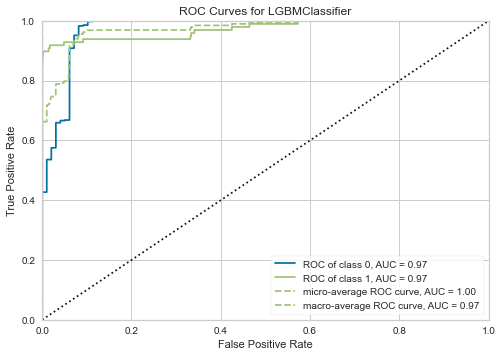

In [16]:
plot_model(tuned_lgbm, 'auc')

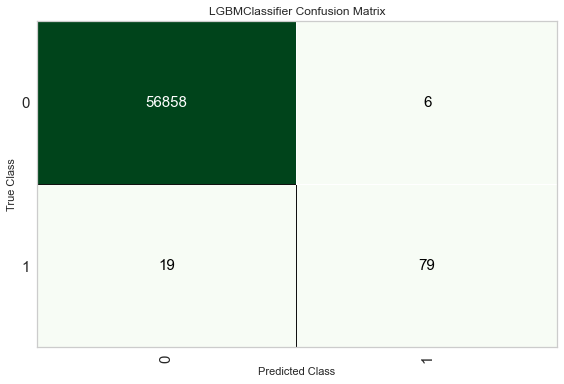

In [17]:
plot_model(tuned_lgbm,'confusion_matrix')

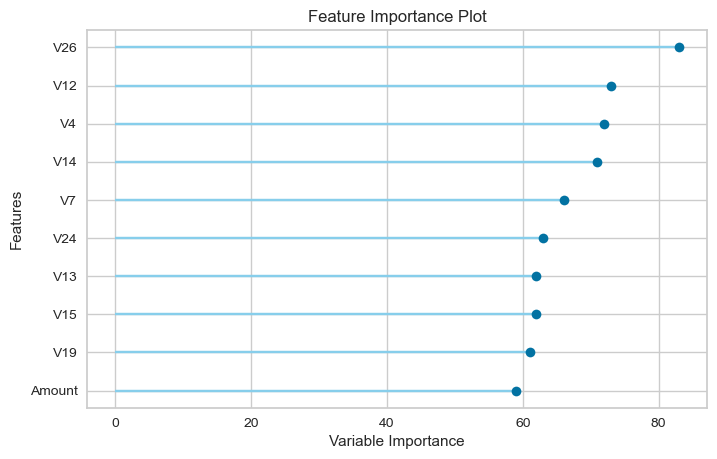

In [18]:
plot_model(tuned_lgbm, plot = 'feature')

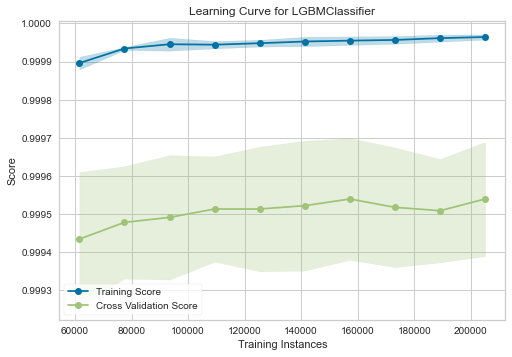

In [19]:
plot_model(tuned_lgbm,'learning') # 약 4분 소요됩니다.

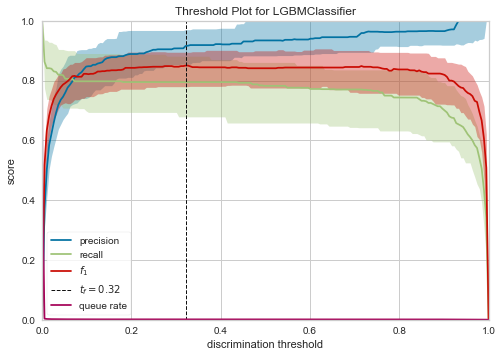

In [20]:
plot_model(tuned_lgbm, 'threshold') # 약 4분 소요됩니다.

# Blend Models
- 다시 돌아와서, 앞서 만든 best3models의 세 모델로 앙상블(soft vote)하기
- blend_models()

In [21]:
blended = blend_models(estimator_list = best3models, fold = 2, method = 'soft') # 약 15분 소요됩니다.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9996,0.9824,0.7919,0.9455,0.8619,0.8617,0.8651
1,0.9995,0.9783,0.7665,0.9321,0.8412,0.8410,0.8450
Mean,0.9995,0.9804,0.7792,0.9388,0.8516,0.8513,0.8550
SD,0.0000,0.0021,0.0127,0.0067,0.0103,0.0103,0.0100


# 모델 예측 (Prediction)
- predict_model()
- setup 환경에 이미 hold-out set이 존재하므로 해당 데이터에 대해 예측을 하여 모델 성능을 확인하겠습니다.


In [22]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9996,0.9787,0.8061,0.9634,0.8778,0.8776,0.8811


# 전체 데이터에 대한 재학습 (Re-training the model on whole data)
-  final_model()
- 현재까지 실험은 주어진 train 데이터를 다시 한 번 train / validation으로 나눠서 실험을 한 것이므로, 전체 train 데이터에 학습되어 있지 않습니다.
최적의 성능을 위해 전체 데이터에 학습을 시켜주도록 하겠습니다.

In [ ]:
# 안 돌려도 됨
final_model = finalize_model(blended)

# 결론
- 정규화, 로그변환, 이상치제거, SMOTE 등을 직접 하지 않고 모두 기계에게 맡기는 AutoML
- Pycaret 이 제공하는 기본적인 기능을 사용했으나, 유의미한 결과를 얻을 수 있었음
- 추가 작업을 통해 성능을 더 향상시킬 수 있을거라 기대됨
- 홈페이지와 공식 문서가 매우 잘 정리되어 있으니 관심있다면 공부해 보는 것도 좋을 것 같습니다.